In [1]:
%matplotlib inline

# importando bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
co2 = 'co2_emissions_tonnes_per_person.xlsx'
co2 = pd.read_excel(co2)
co2

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,0.0865,...,0.238,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254
1,Angola,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,0.4800,...,1.230,1.240,1.250,1.350,1.280,1.640,1.220,1.180,1.140,1.120
2,Albania,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,1.5500,...,1.470,1.560,1.790,1.690,1.690,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,101.0000,...,20.900,18.300,18.900,23.800,23.700,24.200,20.700,21.700,21.100,21.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,0.1640,0.1580,0.1840,0.2080,0.231,0.196,0.191,0.213,0.2090,...,1.010,1.010,1.080,1.050,1.040,1.090,1.210,1.260,1.290,1.320
190,Yemen,0.4940,0.7100,0.5250,0.6440,0.686,0.596,0.517,1.940,0.7670,...,1.080,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356
191,South Africa,5.8300,5.8900,5.9600,6.3300,6.620,6.450,6.560,6.590,6.6600,...,9.960,9.160,9.160,8.770,8.530,8.860,8.350,8.460,8.120,8.100
192,Zambia,1.1700,1.1000,1.0300,0.9460,1.100,0.951,1.260,1.170,1.0600,...,0.182,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302


In [3]:
vida = 'life_expectancy_years.xlsx'
vida = pd.read_excel(vida)
vida

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,45.3,45.5,45.7,45.9,46.1,46.3,46.5,46.7,46.9,...,59.9,60.5,61.0,61.4,61.9,61.9,61.9,62.0,62.9,62.7
1,Angola,44.8,45.0,45.2,45.4,45.6,45.8,46.0,46.2,46.4,...,59.5,60.2,60.8,61.4,62.1,63.0,63.5,63.9,64.2,64.6
2,Albania,63.3,63.3,63.8,64.4,64.8,65.5,66.1,66.5,67.1,...,78.0,78.1,78.1,78.2,78.3,78.2,78.1,78.2,78.3,78.4
3,Andorra,75.8,75.9,76.0,76.2,76.3,76.4,76.5,76.7,76.8,...,81.8,81.8,81.9,81.9,82.0,82.0,82.0,82.1,82.1,82.1
4,United Arab Emirates,60.8,61.3,61.6,62.1,62.6,63.0,63.4,63.8,64.2,...,70.6,70.8,71.0,71.2,71.6,73.0,73.2,73.4,73.5,73.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,61.1,61.3,61.4,57.2,61.3,61.3,61.8,62.0,62.2,...,67.5,69.6,69.7,69.6,69.9,70.0,70.1,70.2,70.3,70.4
191,Yemen,37.1,36.3,36.9,37.6,38.2,38.8,39.4,40.2,41.0,...,67.2,67.6,67.8,67.9,68.4,68.5,68.2,67.5,67.3,66.1
192,South Africa,54.2,54.4,54.6,54.9,55.2,55.5,55.8,56.1,56.4,...,55.7,57.1,58.7,60.1,61.3,61.8,62.3,62.7,63.2,64.4
193,Zambia,49.9,50.1,50.4,50.7,51.2,51.7,52.3,52.8,53.2,...,55.7,56.5,57.5,58.5,59.5,60.2,60.8,61.4,61.9,62.5


In [4]:
co2_index = co2.set_index('country')
vida_index = vida.set_index('country')

junto = co2_index.join(vida_index, how='inner', lsuffix='_co2', rsuffix='_vida')

In [5]:
df = junto[['2017_co2','2017_vida']].dropna()
df

,2017_co2,2017_vida
country,,
Afghanistan,0.254,62.7
Angola,1.120,64.6
Albania,1.590,78.4
Andorra,6.120,82.1
United Arab Emirates,21.400,73.7
...,...,...
Samoa,1.320,70.4
Yemen,0.356,66.1
South Africa,8.100,64.4


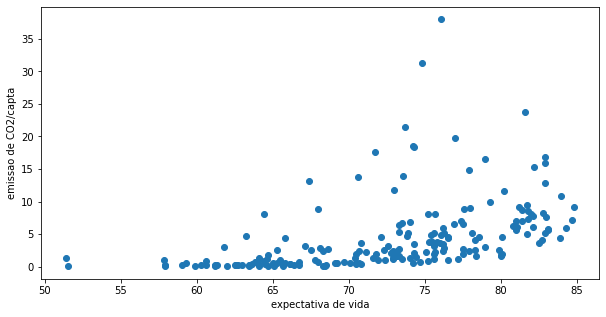

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['2017_vida'], df['2017_co2'])
plt.ylabel('emissao de CO2/capta')
plt.xlabel('expectativa de vida')
plt.show()

In [7]:
correlacao = df['2017_vida'].corr(df['2017_co2'])
correlacao

0.4556390474779308

Esse valor de correlação mostra que as variaveis têm uma relação positiva e moderada, ou seja, são diretamentes proporcionais entre si e que alguns pontos estao singelamente distantes dessa 

In [8]:
x = df['2017_vida']
y = df['2017_co2']

cov = x.cov(y)
varx = x.var()

b1 = cov/varx

yb = y.mean()
xb = x.mean()

b0 = yb - (xb*b1)

print(cov, varx, yb, xb, b1, b0)

18.326811964864 51.241977007772 4.501543005181347 72.54611398963733 0.35765232012973125 -21.4447429796084


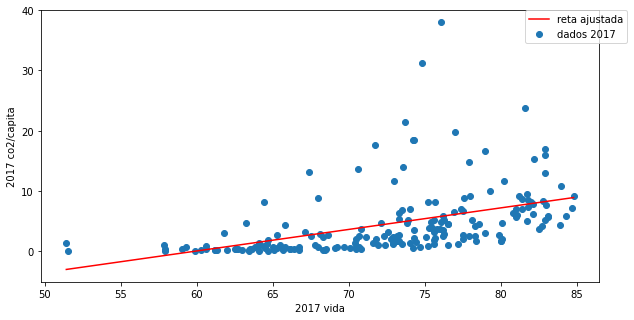

In [53]:
x_vec = np.linspace(x.min(), x.max(), 10000)
y_vec = b0 + b1*x_vec

plt.figure(figsize=(10,5))
plt.plot(x_vec,y_vec, color='r')
plt.scatter(x, y);
plt.xlabel('2017 vida')
plt.ylabel('2017 co2/capita')
plt.legend(('reta ajustada','dados 2017'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [54]:
X = sm.add_constant(x)

model = sm.OLS(y, X)    

results = model.fit()   
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               2017_co2   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     50.04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.77e-11
Time:                        23:43:58   Log-Likelihood:                -584.04
No. Observations:                 193   AIC:                             1172.
Df Residuals:                     191   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.4447      3.686     -5.819      0.000     -28.714     -14.175
2017_vida      0.3577      0.051      7.074      0.000       0.258       0.457
==============================================================================
Omnibus:                      153.268   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1603.137
Skew:                           3.059   Prob(JB):                         0.00
Kurtosis:                      15.725   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
beta0 = results.params['const']
beta1 = results.params['2017_vida']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): -21.44474297960837
Estimativa de beta1 (coeficente angular): 0.3576523201297309


In [56]:
valorp_beta0 = results.pvalues['const']
valorp_beta1 = results.pvalues['2017_vida']

print('Valor-p sob H0: beta0 = 0: {:.6f}'.format(valorp_beta0))
print('Valor-p sob H0: beta1 = 0: {:.6f}'.format(valorp_beta1))

Valor-p sob H0: beta0 = 0: 0.000000
Valor-p sob H0: beta1 = 0: 0.000000


In [57]:
limpo = junto.dropna()
limpo

,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,1965_co2,1966_co2,1967_co2,1968_co2,1969_co2,...,2008_vida,2009_vida,2010_vida,2011_vida,2012_vida,2013_vida,2014_vida,2015_vida,2016_vida,2017_vida
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,0.0865,0.150,...,59.9,60.5,61.0,61.4,61.9,61.9,61.9,62.0,62.9,62.7
Angola,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,0.4800,0.608,...,59.5,60.2,60.8,61.4,62.1,63.0,63.5,63.9,64.2,64.6
Albania,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,1.5500,1.740,...,78.0,78.1,78.1,78.2,78.3,78.2,78.1,78.2,78.3,78.4
United Arab Emirates,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,101.0000,65.000,...,70.6,70.8,71.0,71.2,71.6,73.0,73.2,73.4,73.5,73.7
Argentina,2.4600,2.5400,2.3300,2.5500,2.660,2.810,2.870,2.980,3.2900,3.460,...,75.8,75.9,76.0,76.2,76.3,76.5,76.5,76.2,76.3,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.1640,0.1580,0.1840,0.2080,0.231,0.196,0.191,0.213,0.2090,0.205,...,67.5,69.6,69.7,69.6,69.9,70.0,70.1,70.2,70.3,70.4
Yemen,0.4940,0.7100,0.5250,0.6440,0.686,0.596,0.517,1.940,0.7670,0.406,...,67.2,67.6,67.8,67.9,68.4,68.5,68.2,67.5,67.3,66.1
South Africa,5.8300,5.8900,5.9600,6.3300,6.620,6.450,6.560,6.590,6.6600,6.780,...,55.7,57.1,58.7,60.1,61.3,61.8,62.3,62.7,63.2,64.4


In [58]:
sns.heatmap(correlacao, annot=True,cmap=plt.cm.RdYlBu);

ValueError: Must pass 2-d input. shape=()

In [59]:
expectativa = float(input('qual é a expectativa de vida do seu país?: '))

KeyboardInterrupt: Interrupted by user

In [67]:
expectativa = 80
print(x_vec)

[51.4        51.40334033 51.40668067 ... 84.79331933 84.79665967
 84.8       ]


In [68]:
i = 0
for e in x_vec:
    if round(e,2) == expectativa:
        break
    i+=1

print(i)

8561


In [71]:
resposta = y_vec[i]
print('A emissão de co2 per capita de seu país é de', resposta)

A emissão de co2 per capita de seu país é de 7.166226491267707
